In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# Seprate Categorical and Numerical Features

cat_features = []
num_features = []

for column in df.columns:
    if df[column].dtype == 'O':
        cat_features.append(column)
    else:
        num_features.append(column)

print(cat_features)
print(num_features)

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


### Lets Sort By Ship Mode, Segment, Country and State how the stores are performing

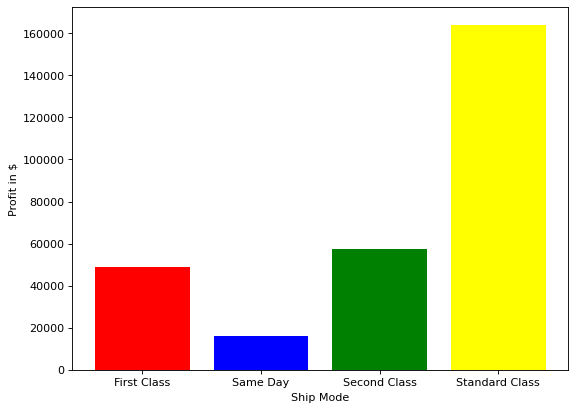

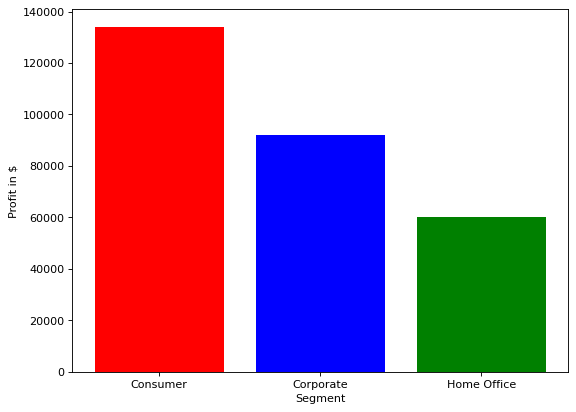

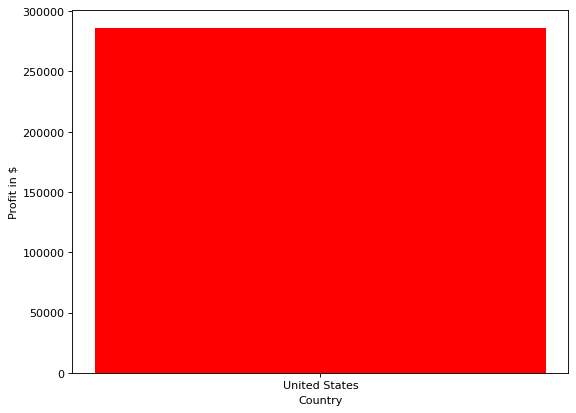

In [30]:

for column in cat_features:
    if column in ['Ship Mode','Segment','Country']:
        grouped_df = df.groupby(column).sum()
        plt.figure(figsize=(8, 6), dpi=80)
        plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
        plt.xlabel(column)
        plt.ylabel('Profit in $')
        plt.show()
        

##### Since All of our products are sold in US, the country column is not of much help. We can also see that most profit is made on standard class but that can be due to the fact that not many people opt for no standard delivery. Finally we can see retail buyers are the biggest consumers of the products. Corporate come in for the second place and lastly we have home offices. Since the pandemic is on the rise and people are buying furniture to convert their home to offices. More profits can be made if we can attract these customers by providing them discount, we can further see what is the discount we are giving out to each kind of buyer

Text(0, 0.5, 'Discount in $')

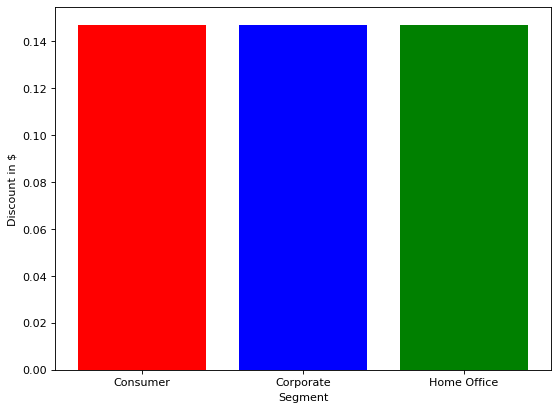

In [125]:

# Group by Segment
grouped_df = df.groupby('Segment').sum()

for segment in grouped_df.index:

    
    count_of_customers = df[df['Segment'] == segment].count()[0]
    discount = grouped_df[grouped_df.index == segment].Discount
    discount_per_cust = discount/count_of_customers



plt.figure(figsize=(8, 6), dpi=80)
plt.bar(grouped_df.index,discount_per_cust,color=['red','blue','green','yellow'])
plt.xlabel('Segment')
plt.ylabel('Discount in $')

##### Since the discount given per customer is almost same, we can say that consumers are shoping more with same discounts. We can also check discount to sales ration but that number would be insignifcantly small.

### State & City Wise Comparison

Text(0.5, 1.0, 'States With Most Loss')

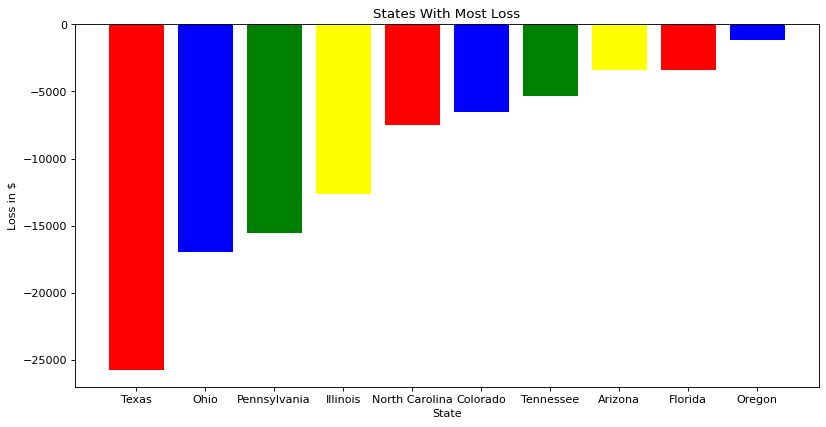

In [82]:

grouped_df = df.groupby('State').sum()
grouped_df.head()

grouped_df = grouped_df.sort_values('Profit')


plt.figure(figsize=(12, 6), dpi=80)
plt.bar(grouped_df.iloc[:10].index,grouped_df.iloc[:10]['Profit'],color=['red','blue','green','yellow'])
plt.xlabel('State')
plt.ylabel('Loss in $')
plt.title('States With Most Loss')

##### As we can see Texas is by far bleeding the most money, followed by Ohio and Pennsylvania. More detailed surveys of the states can be conducted to see why the company is bleeding money. Florida despite being a consumer dominant state fails to generate profit. We can do a smiliar comaprision state wise

Text(0.5, 1.0, 'Cities With Most Loss')

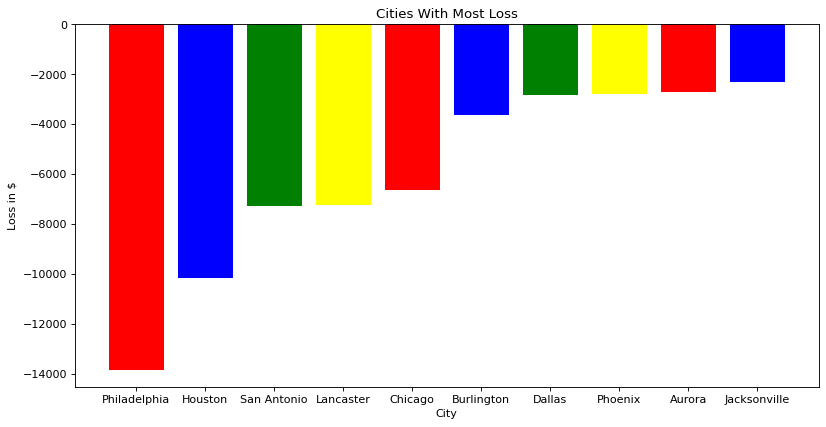

In [83]:

grouped_df = df.groupby('City').sum()

grouped_df = grouped_df.sort_values('Profit')


plt.figure(figsize=(12, 6), dpi=80)
plt.bar(grouped_df.iloc[:10].index,grouped_df.iloc[:10]['Profit'],color=['red','blue','green','yellow'])
plt.xlabel('City')
plt.ylabel('Loss in $')
plt.title('Cities With Most Loss')

##### Most of the losses come from major cities in Pennsylvania and Texas. This might be due to high renting cost of stores in major cities. Company can rethink their renting stratagies in these cities.

### Best States & Cities Generating Profit

Text(0.5, 1.0, 'State With Most Profit')

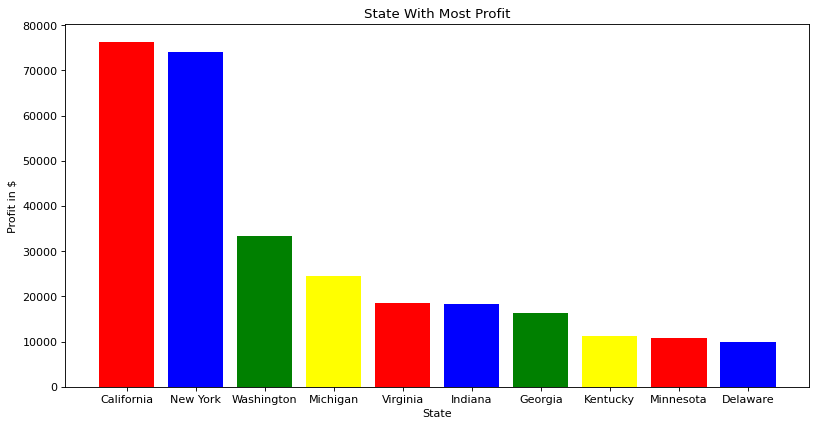

In [87]:

grouped_df = df.groupby('State').sum()

grouped_df = grouped_df.sort_values('Profit',ascending=False)


plt.figure(figsize=(12, 6), dpi=80)
plt.bar(grouped_df.iloc[:10].index,grouped_df.iloc[:10]['Profit'],color=['red','blue','green','yellow'])
plt.xlabel('State')
plt.ylabel('Profit in $')
plt.title('State With Most Profit')

##### California and New York seems to generate most profits. This makes sense because of constant flow of offices and workspaces in these cities. Company can heavily reinvest in these 2 states and providing more discounts in these states.

Text(0.5, 1.0, 'City With Most Profit')

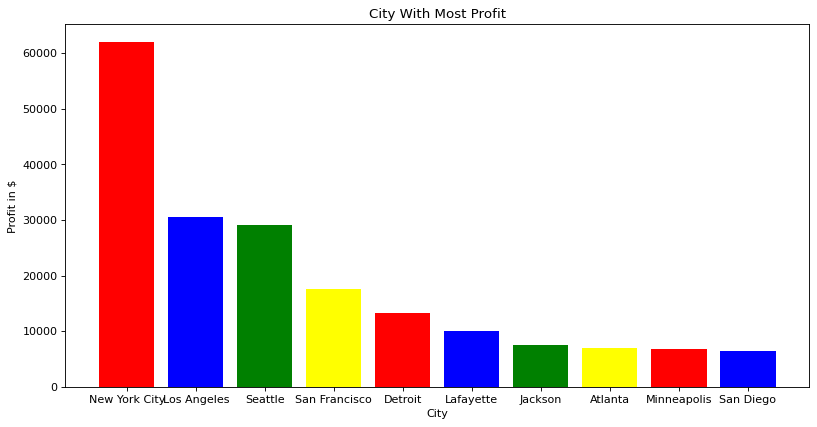

In [88]:

grouped_df = df.groupby('City').sum()

grouped_df = grouped_df.sort_values('Profit',ascending=False)


plt.figure(figsize=(12, 6), dpi=80)
plt.bar(grouped_df.iloc[:10].index,grouped_df.iloc[:10]['Profit'],color=['red','blue','green','yellow'])
plt.xlabel('City')
plt.ylabel('Profit in $')
plt.title('City With Most Profit')

##### A similar case can be seen in case of cities. New York City and most parts of California makes up for the most profits that comes in. Below is a visualization to show the same in terms of pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

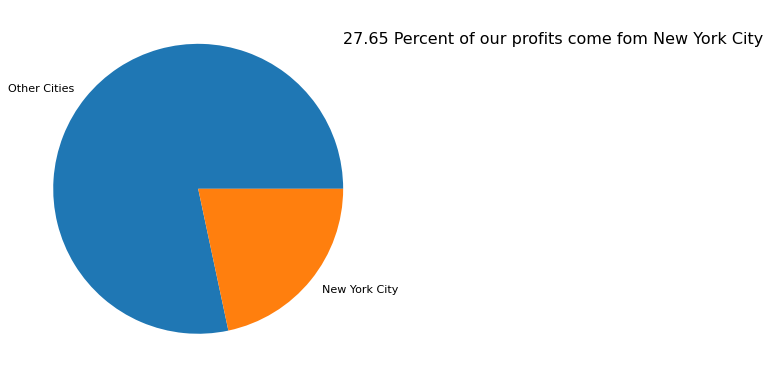

In [126]:

profit_df = pd.DataFrame()

others_sum =  df[df['City'] != 'New York City']['Profit'].sum()
sum_newyork = df[df['City'] == 'New York City']['Profit'].sum()

profit_df['City'] = ['Other Cities','New York City']

profit_df['Profits'] = [others_sum,sum_newyork]
percentage_profit = round((sum_newyork/others_sum*100),2)
plt.figure(figsize=(8, 6), dpi=80)
plt.pie(profit_df['Profits'],labels=profit_df['City'])
plt.text(x=1,y=1,s='{} Percent of our profits come fom New York City'.format(percentage_profit),fontsize='x-large')
plt.show

##### As we can see a huge chunk of our profit, more than a quater, comes from NYC. As the company is doing good in this region we do not have to worry much about it. We can provide more discounts and do more aggresive marketing as the place seems to have a good market. Lets dwell our focus on places that are not doing so good.

### Deeper dive into poor performing states

In [143]:

# function to visualize Segment, Category and subcategory of things by the state provided in the argument
def state_vis(state):
    state_df = df[df['State'] == state]
    for column in cat_features:
        if column in ['Category','Segment','Sub-Category']:
            grouped_df = state_df.groupby(column).sum()
            if len(grouped_df) >10:
                grouped_df = grouped_df.sort_values('Profit',ascending=True)
                
                grouped_df = grouped_df.iloc[:10]
                plt.figure(figsize=(12, 6), dpi=80)
                plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
                plt.xlabel(column)
                plt.ylabel('Profit in $')
                plt.show()


                grouped_df = state_df.groupby(column).sum()
                grouped_df = grouped_df.sort_values('Profit',ascending=False)
                grouped_df = grouped_df.iloc[:10]
                plt.figure(figsize=(12, 6), dpi=80)
                plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
                plt.xlabel(column)
                plt.ylabel('Profit in $')
                plt.show()
    
            else:
                plt.figure(figsize=(12, 6), dpi=80)
                plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
                plt.xlabel(column)
                plt.ylabel('Profit in $')
                plt.show()
        


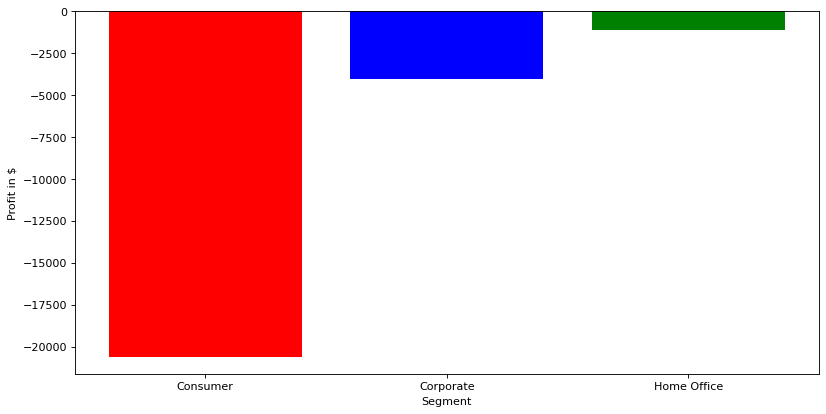

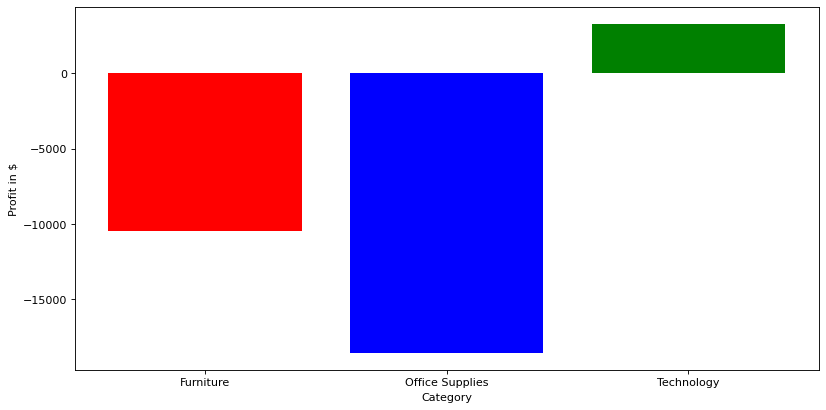

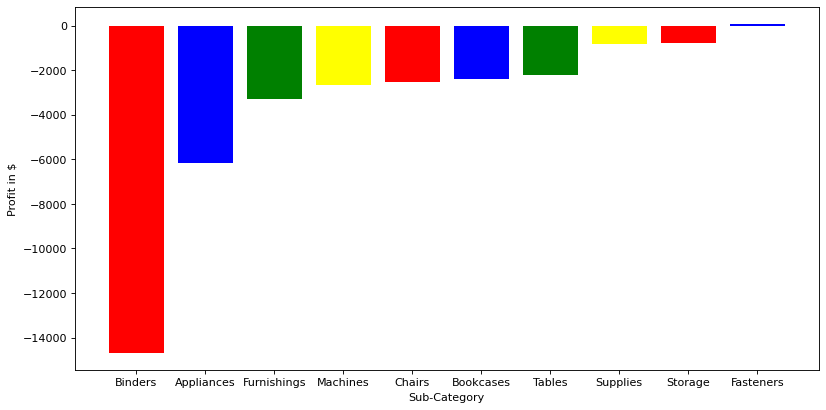

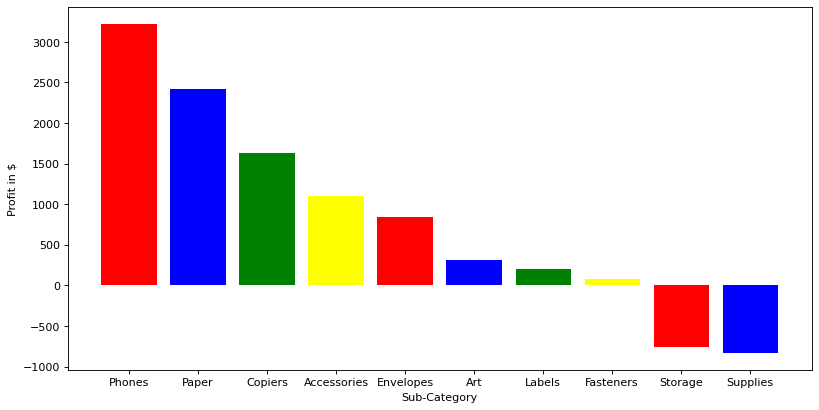

In [144]:
state_vis('Texas')

##### Texas loses Most money on **binders**. The only kind of thing that seems to make any profit are mostly from **technological department** and that too mostly from **Phones**. **Paper** and **copiers** also make a profit but it might be hard to keep them without binders.

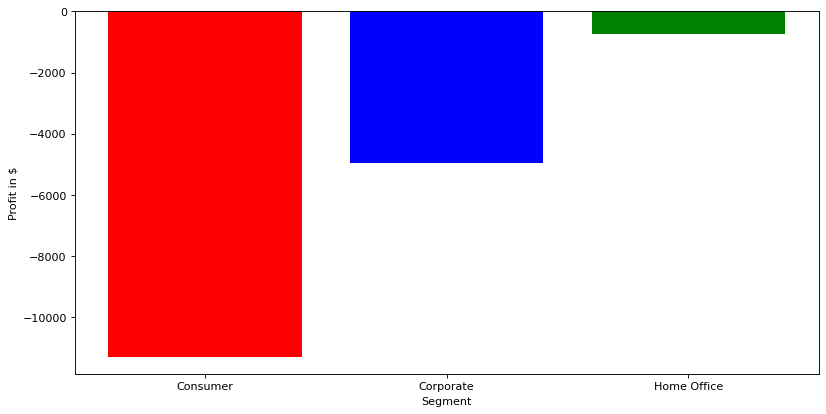

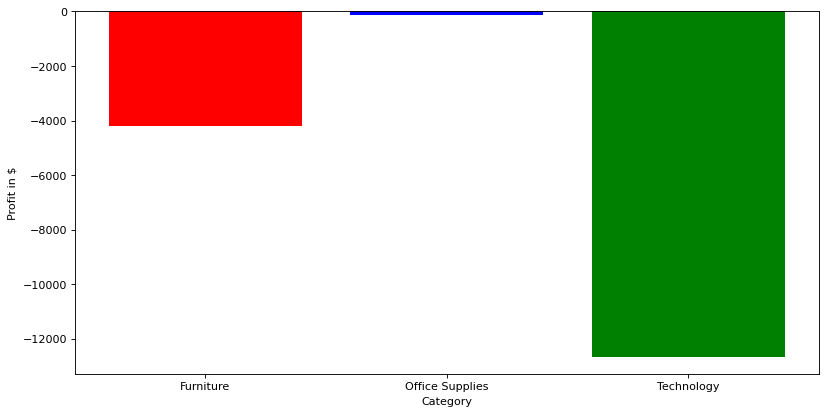

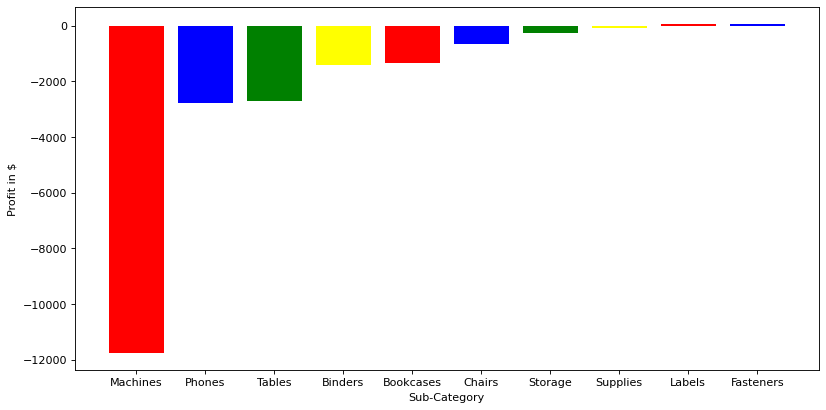

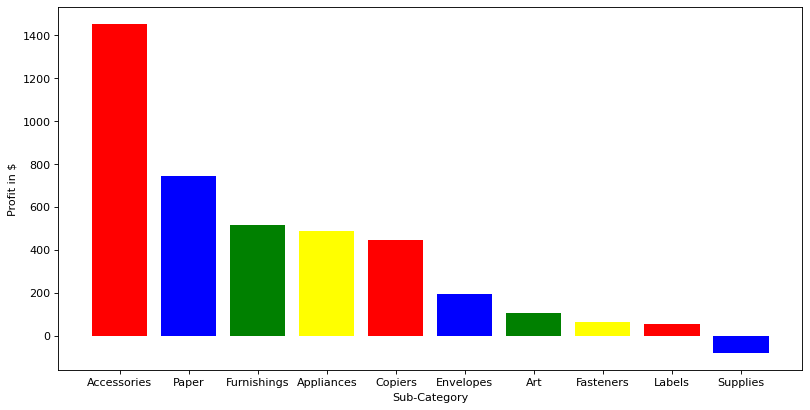

In [145]:
state_vis('Ohio')

##### Ohio loses a lot of money on **machines** making the overall **technology department** bear a heavy loss. **Office supplies** tend to be more profitable in the state of Ohio.

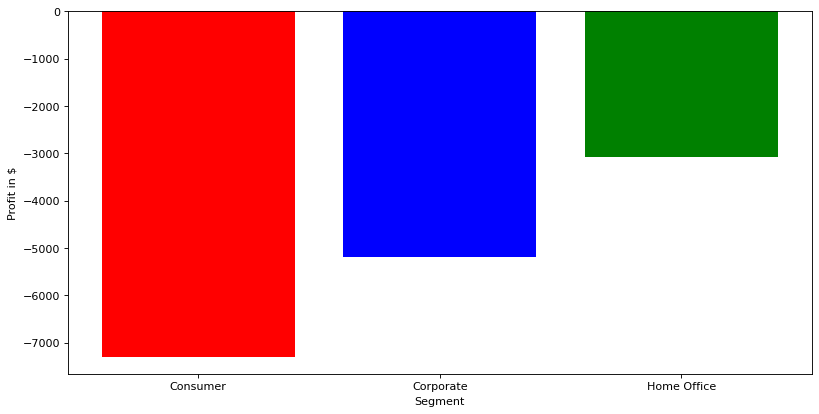

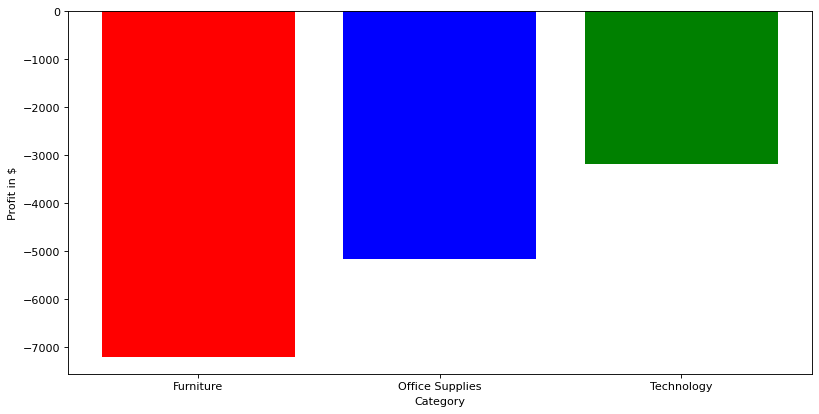

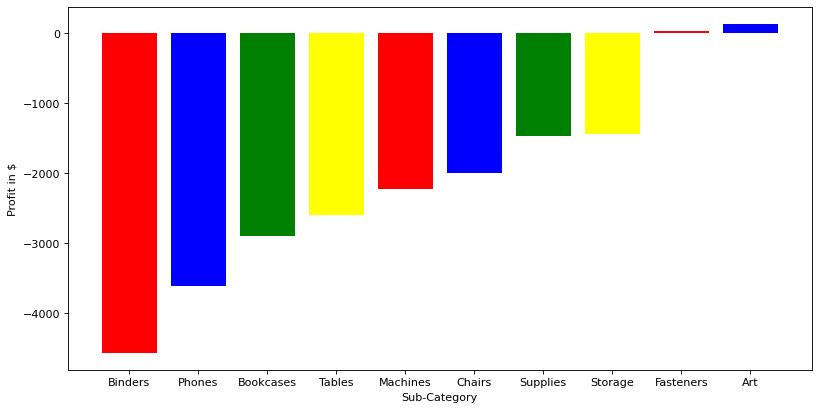

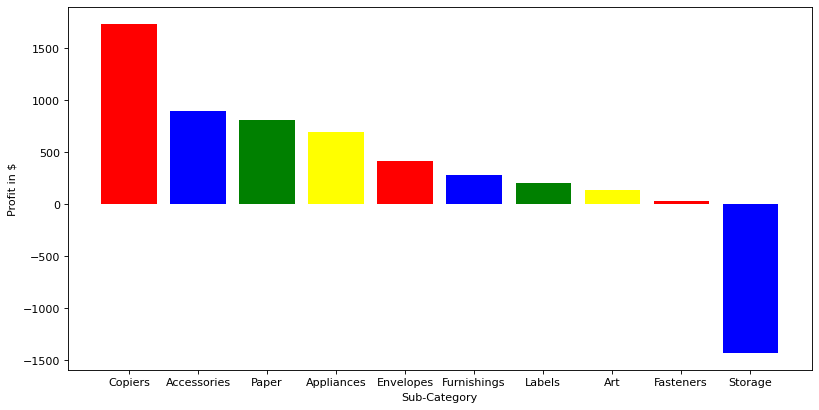

In [146]:
state_vis('Pennsylvania')

##### Pennslyvania also loses a significant amount of money on **Binders**. It also loses money in all kind of supplies. Some of the office supplies such as **copier**, **paper**, **envloves** make a profit but nothing significant. The state seems to do bad in all categories.

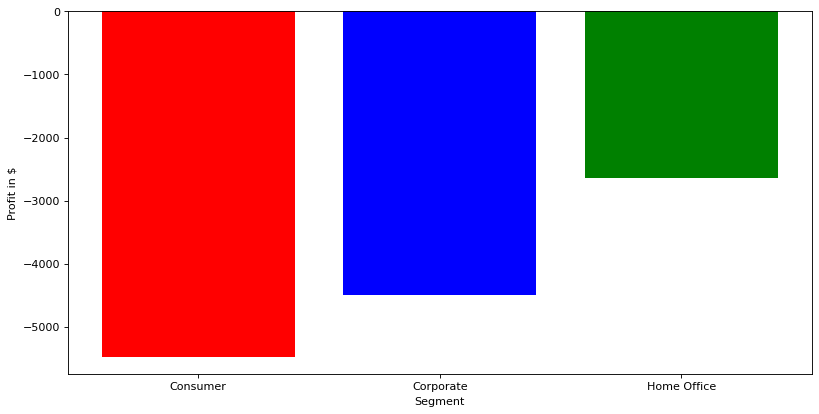

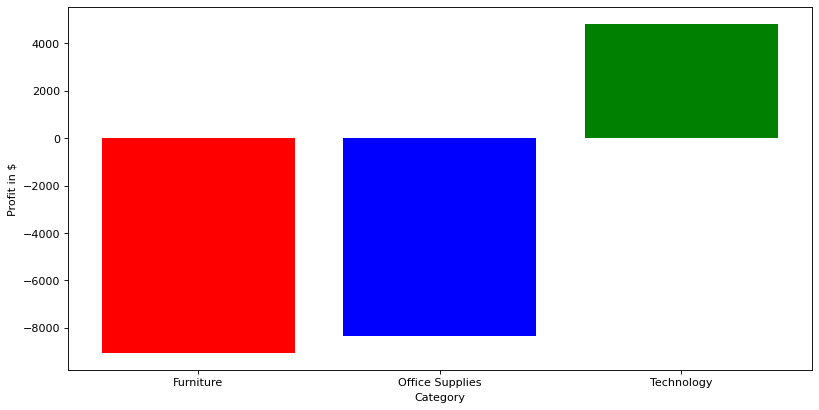

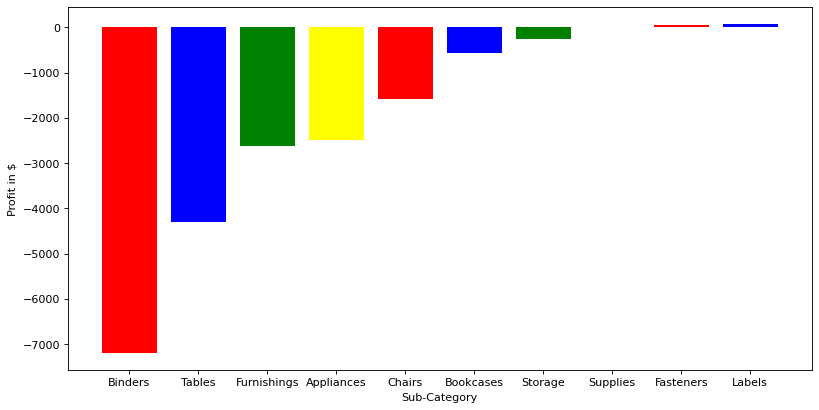

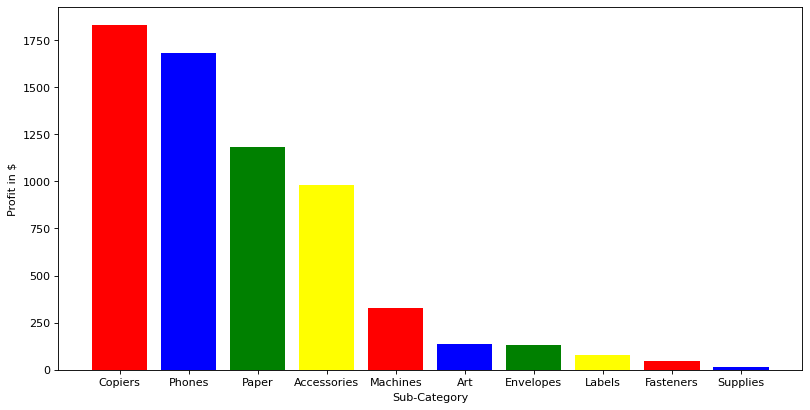

In [149]:
state_vis('Illinois')

##### State of Illinois also loses a lot of money on **binders**. It makes a good profit on **copiers** and **phones** along side with some other office supplies like **paper** and **envelopes**. The state makes profit on technological products.

##### Since in most state the company loses money on **binder**, we can analyse how the company does on each indvidual product and each category

### Product Wise Illustration

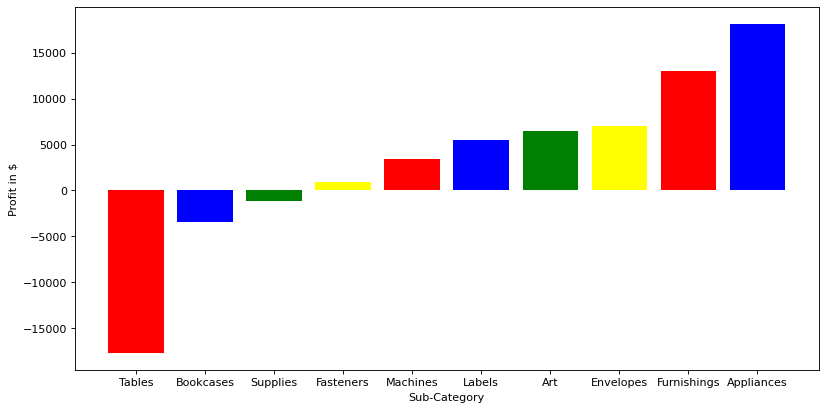

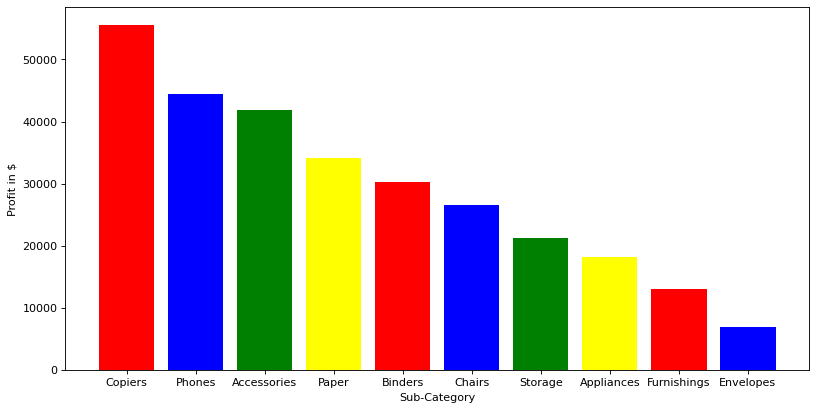

In [161]:

grouped_df = df.groupby('Sub-Category').sum()

if len(grouped_df) >10:

    grouped_df = grouped_df.sort_values('Profit',ascending=True)
    grouped_df = grouped_df.iloc[:10]
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()


    grouped_df = df.groupby(column).sum()
    grouped_df = grouped_df.sort_values('Profit',ascending=False)
    grouped_df = grouped_df.iloc[:10]
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()

else:
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()

##### Across all states **Binder** is a proitable product. **Copiers**, **Phones** and **Accessories** are good profitable prodcuts. **Tables** cost the company the most in terms of profit. Most of the other products seem to be very less loss causing or profitable.

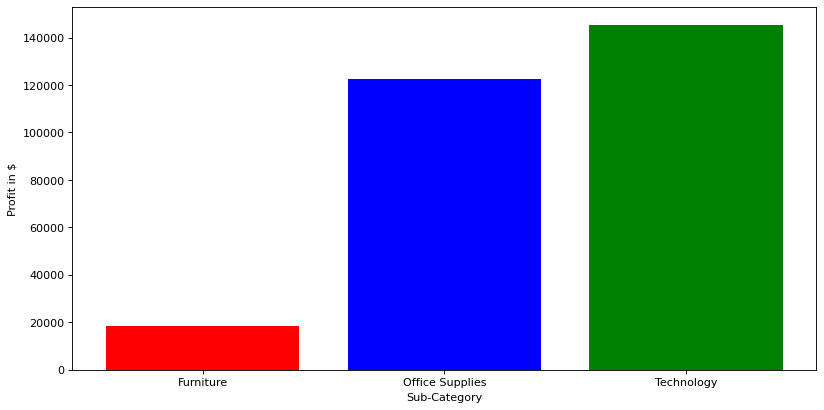

In [159]:
grouped_df = df.groupby('Category').sum()

if len(grouped_df) >10:

    grouped_df = grouped_df.sort_values('Profit',ascending=True)
    grouped_df = grouped_df.iloc[:10]
    print(grouped_df)
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()


    grouped_df = df.groupby(column).sum()
    grouped_df = grouped_df.sort_values('Profit',ascending=False)
    grouped_df = grouped_df.iloc[:10]
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()

else:
    plt.figure(figsize=(12, 6), dpi=80)
    plt.bar(grouped_df.index,grouped_df.Profit.iloc,color=['red','blue','green','yellow'])
    plt.xlabel(column)
    plt.ylabel('Profit in $')
    plt.show()

##### **Furnitures** have the least profitablity out of all the categories. Other 2 categories seem to have way more profit.